# Graph Results

## NPIs

- More stuff to ask about the npis, but its to late to think about it
- Run once with no dampings and plot it
- Think more about the dynamic damping plot and also write set_npis for dynamic!!!!!!!!!!!!!!!!!!!!!!!!!

- Goal: Open
- Start at day N = 60 of carlotta and go on after that 
- Daten aus der Simulation für carlotta in anderer Farbe und dann fortlaufend Kurve simulieren
- Maybe Landkreise hinzufügen in grau https://www.sciencedirect.com/science/article/pii/S0025556421001371

- For dynamic maybe at 50 and 100 

In [1]:
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from memilio.simulation.osecir import InfectionState


In [2]:
def set_fontsize(base_fontsize=17):
    fontsize = base_fontsize
    plt.rcParams.update({
        'font.size': fontsize,
        'axes.titlesize': fontsize * 1,
        'axes.labelsize': fontsize,
        'xtick.labelsize': fontsize * 0.8,
        'ytick.labelsize': fontsize * 0.8,
        'legend.fontsize': fontsize * 0.8,
        'font.family': "Arial"
    })

plt.style.use('default')

dpi = 300

colors = {"Blue": "#155489",
          "Medium blue": "#64A7DD",
          "Light blue": "#B4DCF6",
          "Lilac blue": "#AECCFF",
          "Turquoise": "#76DCEC",
          "Light green": "#B6E6B1",
          "Medium green": "#54B48C",
          "Green": "#5D8A2B",
          "Teal": "#20A398",
          "Yellow": "#FBD263",
          "Orange": "#E89A63",
          "Rose": "#CF7768",
          "Red": "#A34427",
          "Purple": "#741194",
          "Grey": "#C0BFBF",
          "Dark grey": "#616060",
          "Light grey": "#F1F1F1"}


In [3]:
County = {
    1001: 'Flensburg',
    1002: 'Kiel, Landeshauptstadt',
    1003: 'Lübeck, Hansestadt',
    1004: 'Neumünster',
    1051: 'Dithmarschen',
    1053: 'Herzogtum Lauenburg',
    1054: 'Nordfriesland',
    1055: 'Ostholstein',
    1056: 'Pinneberg',
    1057: 'Plön',
    1058: 'Rendsburg-Eckernförde',
    1059: 'Schleswig-Flensburg',
    1060: 'Segeberg',
    1061: 'Steinburg',
    1062: 'Stormarn',
    2000: 'Hamburg, Freie und Hansestadt',
    3101: 'Braunschweig',
    3102: 'Salzgitter',
    3103: 'Wolfsburg',
    3151: 'Gifhorn',
    3153: 'Goslar',
    3154: 'Helmstedt',
    3155: 'Northeim',
    3157: 'Peine',
    3158: 'Wolfenbüttel',
    3159: 'Göttingen',
    3241: 'Region Hannover',
    3251: 'Diepholz',
    3252: 'Hameln-Pyrmont',
    3254: 'Hildesheim',
    3255: 'Holzminden',
    3256: 'Nienburg (Weser)',
    3257: 'Schaumburg',
    3351: 'Celle',
    3352: 'Cuxhaven',
    3353: 'Harburg',
    3354: 'Lüchow-Dannenberg',
    3355: 'Lüneburg',
    3356: 'Osterholz',
    3357: 'Rotenburg (Wümme)',
    3358: 'Heidekreis',
    3359: 'Stade',
    3360: 'Uelzen',
    3361: 'Verden',
    3401: 'Delmenhorst',
    3402: 'Emden',
    3403: 'Oldenburg (Oldenburg)',
    3404: 'Osnabrück',
    3405: 'Wilhelmshaven',
    3451: 'Ammerland',
    3452: 'Aurich',
    3453: 'Cloppenburg',
    3454: 'Emsland',
    3455: 'Friesland',
    3456: 'Grafschaft Bentheim',
    3457: 'Leer',
    3458: 'Oldenburg',
    3459: 'Osnabrück',
    3460: 'Vechta',
    3461: 'Wesermarsch',
    3462: 'Wittmund',
    4011: 'Bremen',
    4012: 'Bremerhaven',
    5111: 'Düsseldorf',
    5112: 'Duisburg',
    5113: 'Essen',
    5114: 'Krefeld',
    5116: 'Mönchengladbach',
    5117: 'Mülheim an der Ruhr',
    5119: 'Oberhausen',
    5120: 'Remscheid',
    5122: 'Solingen, Klingenstadt',
    5124: 'Wuppertal',
    5154: 'Kleve',
    5158: 'Mettmann',
    5162: 'Rhein-Kreis Neuss',
    5166: 'Viersen',
    5170: 'Wesel',
    5314: 'Bonn',
    5315: 'Köln',
    5316: 'Leverkusen',
    5334: 'Aachen',
    5358: 'Düren',
    5362: 'Rhein-Erft-Kreis',
    5366: 'Euskirchen',
    5370: 'Heinsberg',
    5374: 'Oberbergischer Kreis',
    5378: 'Rheinisch-Bergischer Kreis',
    5382: 'Rhein-Sieg-Kreis',
    5512: 'Bottrop',
    5513: 'Gelsenkirchen',
    5515: 'Münster',
    5554: 'Borken',
    5558: 'Coesfeld',
    5562: 'Recklinghausen',
    5566: 'Steinfurt',
    5570: 'Warendorf',
    5711: 'Bielefeld',
    5754: 'Gütersloh',
    5758: 'Herford',
    5762: 'Höxter',
    5766: 'Lippe',
    5770: 'Minden-Lübbecke',
    5774: 'Paderborn',
    5911: 'Bochum',
    5913: 'Dortmund',
    5914: 'Hagen der FernUniversität',
    5915: 'Hamm',
    5916: 'Herne',
    5954: 'Ennepe-Ruhr-Kreis',
    5958: 'Hochsauerlandkreis',
    5962: 'Märkischer Kreis',
    5966: 'Olpe',
    5970: 'Siegen-Wittgenstein',
    5974: 'Soest',
    5978: 'Unna',
    6411: 'Darmstadt, Wissenschaftsstadt',
    6412: 'Frankfurt am Main',
    6413: 'Offenbach am Main',
    6414: 'Wiesbaden, Landeshauptstadt',
    6431: 'Bergstraße',
    6432: 'Darmstadt-Dieburg',
    6433: 'Groß-Gerau',
    6434: 'Hochtaunuskreis',
    6435: 'Main-Kinzig-Kreis',
    6436: 'Main-Taunus-Kreis',
    6437: 'Odenwaldkreis',
    6438: 'Offenbach',
    6439: 'Rheingau-Taunus-Kreis',
    6440: 'Wetteraukreis',
    6531: 'Gießen',
    6532: 'Lahn-Dill-Kreis',
    6533: 'Limburg-Weilburg',
    6534: 'Marburg-Biedenkopf',
    6535: 'Vogelsbergkreis',
    6611: 'Kassel, documenta-Stadt',
    6631: 'Fulda',
    6632: 'Hersfeld-Rotenburg',
    6633: 'Kassel',
    6634: 'Schwalm-Eder-Kreis',
    6635: 'Waldeck-Frankenberg',
    6636: 'Werra-Meißner-Kreis',
    7111: 'Koblenz, kreisfreie Stadt',
    7131: 'Ahrweiler',
    7132: 'Altenkirchen (Westerwald)',
    7133: 'Bad Kreuznach',
    7134: 'Birkenfeld',
    7135: 'Cochem-Zell',
    7137: 'Mayen-Koblenz',
    7138: 'Neuwied',
    7140: 'Rhein-Hunsrück-Kreis',
    7141: 'Rhein-Lahn-Kreis',
    7143: 'Westerwaldkreis',
    7211: 'Trier, kreisfreie Stadt',
    7231: 'Bernkastel-Wittlich',
    7232: 'Eifelkreis Bitburg-Prüm',
    7233: 'Vulkaneifel',
    7235: 'Trier-Saarburg',
    7311: 'Frankenthal (Pfalz), kreisfreie Stadt',
    7312: 'Kaiserslautern, kreisfreie Stadt',
    7313: 'Landau in der Pfalz, kreisfreie Stadt',
    7314: 'Ludwigshafen am Rhein, kreisfreie Stadt',
    7315: 'Mainz, kreisfreie Stadt',
    7316: 'Neustadt an der Weinstraße, kreisfreie Stadt',
    7317: 'Pirmasens, kreisfreie Stadt',
    7318: 'Speyer, kreisfreie Stadt',
    7319: 'Worms, kreisfreie Stadt',
    7320: 'Zweibrücken, kreisfreie Stadt',
    7331: 'Alzey-Worms',
    7332: 'Bad Dürkheim',
    7333: 'Donnersbergkreis',
    7334: 'Germersheim',
    7335: 'Kaiserslautern',
    7336: 'Kusel',
    7337: 'Südliche Weinstraße',
    7338: 'Rhein-Pfalz-Kreis',
    7339: 'Mainz-Bingen',
    7340: 'Südwestpfalz',
    8111: 'Stuttgartkreis',
    8115: 'Böblingen',
    8116: 'Esslingen',
    8117: 'Göppingen',
    8118: 'Ludwigsburg',
    8119: 'Rems-Murr-Kreis',
    8121: 'Heilbronnkreis',
    8125: 'Heilbronn',
    8126: 'Hohenlohekreis',
    8127: 'Schwäbisch Hall',
    8128: 'Main-Tauber-Kreis',
    8135: 'Heidenheim',
    8136: 'Ostalbkreis',
    8211: 'Baden-Badenkreis',
    8212: 'Karlsruhekreis',
    8215: 'Karlsruhe',
    8216: 'Rastatt',
    8221: 'Heidelbergkreis',
    8222: 'Mannheimkreis',
    8225: 'Neckar-Odenwald-Kreis',
    8226: 'Rhein-Neckar-Kreis',
    8231: 'Pforzheimkreis',
    8235: 'Calw',
    8236: 'Enzkreis',
    8237: 'Freudenstadt',
    8311: 'Freiburg im Breisgaukreis',
    8315: 'Breisgau-Hochschwarzwald',
    8316: 'Emmendingen',
    8317: 'Ortenaukreis',
    8325: 'Rottweil',
    8326: 'Schwarzwald-Baar-Kreis',
    8327: 'Tuttlingen',
    8335: 'Konstanz',
    8336: 'Lörrach',
    8337: 'Waldshut',
    8415: 'Reutlingen',
    8416: 'Tübingen',
    8417: 'Zollernalbkreis',
    8421: 'Ulmkreis',
    8425: 'Alb-Donau-Kreis',
    8426: 'Biberach',
    8435: 'Bodenseekreis',
    8436: 'Ravensburg',
    8437: 'Sigmaringen',
    9161: 'Ingolstadt',
    9162: 'München, Landeshauptstadt',
    9163: 'Rosenheimkreis',
    9171: 'Altötting',
    9172: 'Berchtesgadener Land',
    9173: 'Bad Tölz-Wolfratshausen',
    9174: 'Dachau',
    9175: 'Ebersberg',
    9176: 'Eichstätt',
    9177: 'Erding',
    9178: 'Freising',
    9179: 'Fürstenfeldbruck',
    9180: 'Garmisch-Partenkirchen',
    9181: 'Landsberg am Lech',
    9182: 'Miesbach',
    9183: 'Mühldorf a.Inn',
    9184: 'München',
    9185: 'Neuburg-Schrobenhausen',
    9186: 'Pfaffenhofen a.d.Ilm',
    9187: 'Rosenheim',
    9188: 'Starnberg',
    9189: 'Traunstein',
    9190: 'Weilheim-Schongau',
    9261: 'Landshutkreis',
    9262: 'Passaukreis',
    9263: 'Straubing',
    9271: 'Deggendorf',
    9272: 'Freyung-Grafenau',
    9273: 'Kelheim',
    9274: 'Landshut',
    9275: 'Passau',
    9276: 'Regen',
    9277: 'Rottal-Inn',
    9278: 'Straubing-Bogen',
    9279: 'Dingolfing-Landau',
    9361: 'Amberg',
    9362: 'Regensburgkreis',
    9363: 'Weiden i.d.OPf.',
    9371: 'Amberg-Sulzbach',
    9372: 'Cham',
    9373: 'Neumarkt i.d.OPf.',
    9374: 'Neustadt a.d.Waldnaab',
    9375: 'Regensburg',
    9376: 'Schwandorf',
    9377: 'Tirschenreuth',
    9461: 'Bambergkreis',
    9462: 'Bayreuthkreis',
    9463: 'Coburgkreis',
    9464: 'Hofkreis',
    9471: 'Bamberg',
    9472: 'Bayreuth',
    9473: 'Coburg',
    9474: 'Forchheim',
    9475: 'Hof',
    9476: 'Kronach',
    9477: 'Kulmbach',
    9478: 'Lichtenfels',
    9479: 'Wunsiedel i.Fichtelgebirge',
    9561: 'Ansbachkreis',
    9562: 'Erlangen',
    9563: 'Fürthkreis',
    9564: 'Nürnberg',
    9565: 'Schwabach',
    9571: 'Ansbach',
    9572: 'Erlangen-Höchstadt',
    9573: 'Fürth',
    9574: 'Nürnberger Land',
    9575: 'Neustadt a.d.Aisch-Bad Windsheim',
    9576: 'Roth',
    9577: 'Weißenburg-Gunzenhausen',
    9661: 'Aschaffenburgkreis',
    9662: 'Schweinfurtkreis',
    9663: 'Würzburgkreis',
    9671: 'Aschaffenburg',
    9672: 'Bad Kissingen',
    9673: 'Rhön-Grabfeld',
    9674: 'Haßberge',
    9675: 'Kitzingen',
    9676: 'Miltenberg',
    9677: 'Main-Spessart',
    9678: 'Schweinfurt',
    9679: 'Würzburg',
    9761: 'Augsburgkreis',
    9762: 'Kaufbeuren',
    9763: 'Kempten (Allgäu)',
    9764: 'Memmingen',
    9771: 'Aichach-Friedberg',
    9772: 'Augsburg',
    9773: 'Dillingen a.d.Donau',
    9774: 'Günzburg',
    9775: 'Neu-Ulm',
    9776: 'Lindau (Bodensee)',
    9777: 'Ostallgäu',
    9778: 'Unterallgäu',
    9779: 'Donau-Ries',
    9780: 'Oberallgäu',
    10041: 'Regionalverband Saarbrücken',
    10042: 'Merzig-Wadern',
    10043: 'Neunkirchen',
    10044: 'Saarlouis',
    10045: 'Saarpfalz-Kreis',
    10046: 'St. Wendel',
    11000: 'Berlin',
    11001: 'Berlin Mitte',
    11002: 'Berlin Friedrichshain-Kreuzberg',
    11003: 'Berlin Pankow',
    11004: 'Berlin Charlottenburg-Wilmersdorf',
    11005: 'Berlin Spandau',
    11006: 'Berlin Steglitz-Zehlendorf',
    11007: 'Berlin Tempelhof-Schöneberg',
    11008: 'Berlin Neukölln',
    11009: 'Berlin Treptow-Köpenick',
    11010: 'Berlin Marzahn-Hellersdorf',
    11011: 'Berlin Lichtenberg',
    11012: 'Berlin Reinickendorf',
    12051: 'Brandenburg an der Havel',
    12052: 'Cottbus',
    12053: 'Frankfurt (Oder)',
    12054: 'Potsdam',
    12060: 'Barnim',
    12061: 'Dahme-Spreewald',
    12062: 'Elbe-Elster',
    12063: 'Havelland',
    12064: 'Märkisch-Oderland',
    12065: 'Oberhavel',
    12066: 'Oberspreewald-Lausitz',
    12067: 'Oder-Spree',
    12068: 'Ostprignitz-Ruppin',
    12069: 'Potsdam-Mittelmark',
    12070: 'Prignitz',
    12071: 'Spree-Neiße',
    12072: 'Teltow-Fläming',
    12073: 'Uckermark',
    13003: 'Rostock',
    13004: 'Schwerin',
    13071: 'Mecklenburgische Seenplatte',
    13072: 'Landkreis Rostock',
    13073: 'Vorpommern-Rügen',
    13074: 'Nordwestmecklenburg',
    13075: 'Vorpommern-Greifswald',
    13076: 'Ludwigslust-Parchim',
    14511: 'Chemnitz',
    14521: 'Erzgebirgskreis',
    14522: 'Mittelsachsen',
    14523: 'Vogtlandkreis',
    14524: 'Zwickau',
    14612: 'Dresden',
    14625: 'Bautzen',
    14626: 'Görlitz',
    14627: 'Meißen',
    14628: 'Sächsische Schweiz-Osterzgebirge',
    14713: 'Leipzig',
    14729: 'Leipzig',
    14730: 'Nordsachsen',
    15001: 'Dessau-Roßlau',
    15002: 'Halle (Saale)',
    15003: 'Magdeburg, Landeshauptstadt',
    15081: 'Altmarkkreis Salzwedel',
    15082: 'Anhalt-Bitterfeld',
    15083: 'Börde',
    15084: 'Burgenlandkreis',
    15085: 'Harz',
    15086: 'Jerichower Land',
    15087: 'Mansfeld-Südharz',
    15088: 'Saalekreis',
    15089: 'Salzlandkreis',
    15090: 'Stendal',
    15091: 'Wittenberg',
    16051: 'Erfurt',
    16052: 'Gera',
    16053: 'Jena',
    16054: 'Suhl',
    16055: 'Weimar',
    16056: 'Eisenach',
    16061: 'Eichsfeld',
    16062: 'Nordhausen',
    16063: 'Wartburgkreis',
    16064: 'Unstrut-Hainich-Kreis',
    16065: 'Kyffhäuserkreis',
    16066: 'Schmalkalden-Meiningen',
    16067: 'Gotha',
    16068: 'Sömmerda',
    16069: 'Hildburghausen',
    16070: 'Ilm-Kreis',
    16071: 'Weimarer Land',
    16072: 'Sonneberg',
    16073: 'Saalfeld-Rudolstadt',
    16074: 'Saale-Holzland-Kreis',
    16075: 'Saale-Orla-Kreis',
    16076: 'Greiz',
    16077: 'Altenburger Land'
}


In [4]:
infection_state_names = []
for name, value in InfectionState.__members__.items():
    infection_state_names.append(f"{name}")
print( infection_state_names)


['Susceptible', 'Exposed', 'InfectedNoSymptoms', 'InfectedNoSymptomsConfirmed', 'InfectedSymptoms', 'InfectedSymptomsConfirmed', 'InfectedSevere', 'InfectedCritical', 'Recovered', 'Dead']


In [5]:
simulation_h5_initial_data = "../../../tools/optimal_control/secir_dynamic_NPIs/optimization_model/results_run0.h5"
simulation_h5_optimal_control_data = "result_optimal_controls_50k.h5"

h5file_start = h5py.File(simulation_h5_initial_data, 'r') # Day 0-60
h5file_optimal_controls = h5py.File(simulation_h5_optimal_control_data, 'r') # Day 60-120

def preprocess_data(filepath):
    h5file = h5py.File(filepath, 'r')
    region_names = list(h5file.keys())

    first_region = h5file[region_names[0]]
    time = first_region["Time"][:]
    data_shape = first_region["Total"].shape

    total_sum = np.zeros(data_shape, dtype=np.float64)

    for region in region_names:
        total_sum += h5file[region]["Total"][:]

    df = pd.DataFrame(total_sum, index=time, columns=infection_state_names)
    df.index.name = "time"
    return df

df_start = preprocess_data(simulation_h5_initial_data)             # days 0–60
df_opt   = preprocess_data(simulation_h5_optimal_control_data)     # days 0–60 internally, but should map to 60–120

# Shift the optimal-control times by +60 days
df_opt_shifted = df_opt.copy()
df_opt_shifted.index = df_opt_shifted.index + 60


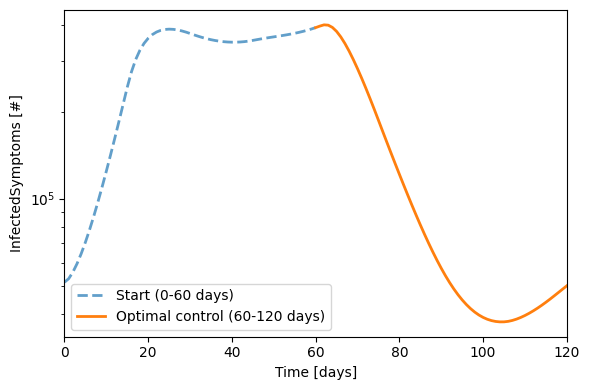

In [6]:
# Choose which infection state to plot
state = "InfectedSymptoms"

# ---- Start building the figure ----
fig, ax = plt.subplots(figsize=(6, 4))

# Plot day 0–60 (dotted)
ax.plot(
    df_start.index,
    df_start[state],
    linestyle="--",
    linewidth=2,
    alpha=0.7,
    label="Start (0-60 days)"
)

# Plot day 60–120 (solid)
ax.plot(
    df_opt_shifted.index,
    df_opt_shifted[state],
    linewidth=2,
    label="Optimal control (60-120 days)"
)

# # ---- Labels, formatting ----
ax.set_xlabel("Time [days]")
ax.set_ylabel(f"{state} [#]")
ax.set_xlim(0, 120)
ax.grid(False)
ax.ticklabel_format(style='plain', axis='y')
ax.set_yscale("log")

ax.legend()
plt.tight_layout()
plt.show()


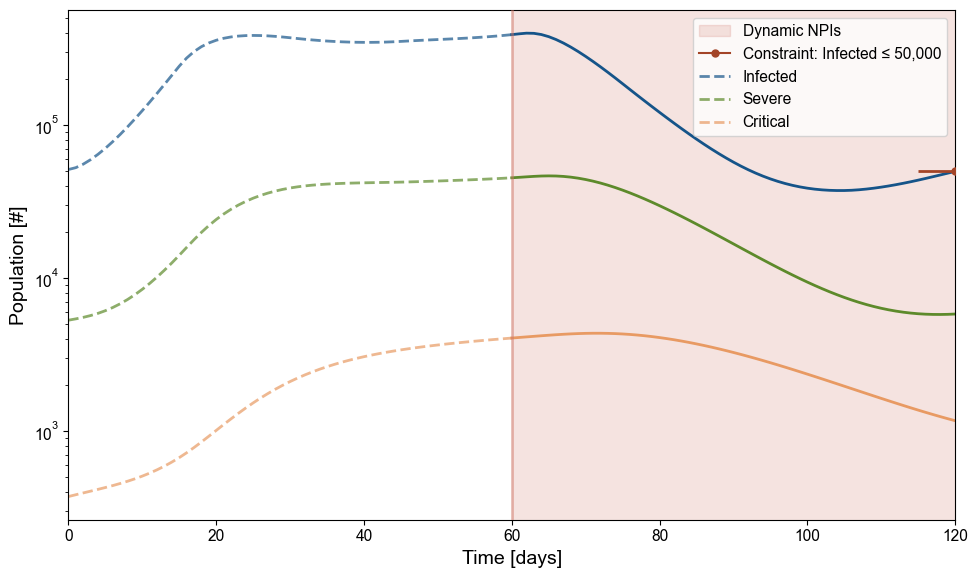

In [7]:
import matplotlib.patches as mpatches

terminal_constraint = 50000

states_to_plot = [
    ("Infected", "InfectedSymptoms", "Blue"),
    ("Severe", "InfectedSevere", "Green"),
    ("Critical", "InfectedCritical", "Orange")
]

set_fontsize(14)
fig, ax = plt.subplots(figsize=(10, 6))

# Terminal constraint marker
ax.plot(
    120,
    terminal_constraint,
    marker='o',
    color=colors["Red"],
    markersize=5,
    zorder=10,
    label=f'Constraint: Infected ≤ {terminal_constraint:,}'
)

# Plot states
for label, state, color_name in states_to_plot:
    # Plot day 0–60 (dashed)
    ax.plot(
        df_start.index,
        df_start[state],
        linestyle="--",
        linewidth=2,
        alpha=0.7,
        label=label,
        color=colors[color_name]
    )

    # Plot day 60–120 (solid, same color, no legend entry)
    ax.plot(
        df_opt_shifted.index,
        df_opt_shifted[state],
        linestyle="-",
        linewidth=2,
        label="_nolegend_",
        color=colors[color_name]
    )

# Horizontal line for terminal constraint
half_width = 5  # days
ax.hlines(
    y=terminal_constraint,
    xmin=120 - half_width,
    xmax=120 + half_width,
    colors=colors["Red"],
    lw=2,
    zorder=9
)

# Vertical line at t=60
ax.axvline(x=60, color=colors["Rose"], linestyle='-', linewidth=2, zorder=5, alpha=0.5)

# Rose background region (Dynamic NPIs)
ax.axvspan(
    60, 120,
    facecolor=colors["Rose"],
    alpha=0.2,
    zorder=0
)

# ---- Formatting ----
ax.set_xlabel("Time [days]")
ax.set_ylabel("Population [#]")
ax.set_xlim(0, 120)
ax.set_yscale("log")
ax.grid(False)

# ---- Custom legend ----
# Create a patch for the rose region
dynamic_npi_patch = mpatches.Patch(color=colors["Rose"], alpha=0.2, label="Dynamic NPIs")

# Combine with existing handles
handles, labels = ax.get_legend_handles_labels()
handles.insert(0, dynamic_npi_patch)
labels.insert(0, "Dynamic NPIs")

ax.legend(handles=handles, labels=labels)

plt.tight_layout()
plt.savefig('population_50k.png', dpi=dpi)


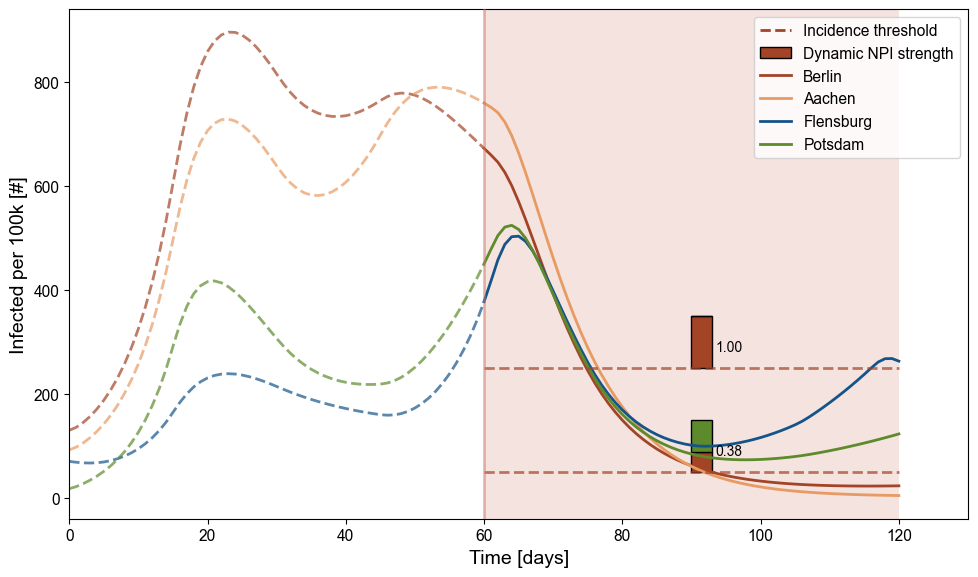

In [8]:
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

# List of nodes with assigned colors
nodes_colors = [
    (11000, "Red"),
    (5334, "Orange"),
    (1001, "Blue"),
    (12054, "Green")
]

infected_states = [4]  # InfectedSymptoms
alive_states = list(range(10))  # All states except Dead

# ---- Create the plot ----
set_fontsize(14)
fig, ax = plt.subplots(figsize=(10, 6))

# Thresholds for NPI bars
thresholds = [50, 250]
strengths = [0.382068, 1.0] # 50k
bar_x_start = 90
bar_width = 3
bar_height = 100

def preprocess_cases_per_100k(filepath, node):
    h5 = h5py.File(filepath, "r")
    grp = h5[str(node)]

    time = grp["Time"][:]              # (T,)
    data = grp["Total"][:]             # (T, S)

    infected = data[:, infected_states].sum(axis=1)
    alive    = data[:, alive_states].sum(axis=1)

    cases_per_100k = 100000 * infected / alive[0]

    series = pd.Series(cases_per_100k, index=time, name="cases_per_100k")
    return series

# ---- Plot nodes ----
for node, color_name in nodes_colors:
    county_name = County.get(node, f"County {node}")
    
    # Load data
    cases_start = preprocess_cases_per_100k(simulation_h5_initial_data, node)
    cases_opt = preprocess_cases_per_100k(simulation_h5_optimal_control_data, node)
    
    # Shift optimal control period by +60 days
    cases_opt_shifted = cases_opt.copy()
    cases_opt_shifted.index = cases_opt_shifted.index + 60
    
    color = colors[color_name]

    # Plot day 0–60 (dashed)
    ax.plot(
        cases_start.index,
        cases_start.values,
        linestyle="--",
        linewidth=2,
        alpha=0.7,
        color=color
    )
    
    # Plot day 60–120 (solid)
    ax.plot(
        cases_opt_shifted.index,
        cases_opt_shifted.values,
        linestyle="-",
        linewidth=2,
        color=color
    )
    
    # ---- Add legend entry for this node ----
    ax.plot([], [], color=color, linewidth=2, linestyle='-', 
            label=f"{county_name}")

# ---- Add threshold lines ----
for threshold in thresholds:
    ax.hlines(
        y=threshold,
        color=colors["Red"],
        xmin=60,
        xmax=120,
        linestyle='--',
        linewidth=2,
        alpha=0.7,
        label='_nolegend_'
    )

# ---- Add strength bars at the right side ----
for i, (threshold, strength) in enumerate(zip(thresholds, strengths)):
    red_height = bar_height * strength
    green_height = bar_height * (1 - strength)
    
    ax.add_patch(plt.Rectangle(
        (bar_x_start, threshold),
        bar_width,
        red_height,
        facecolor=colors["Red"],
        edgecolor='black',
        linewidth=1
    ))
    
    ax.add_patch(plt.Rectangle(
        (bar_x_start, threshold + red_height),
        bar_width,
        green_height,
        facecolor=colors["Green"],
        edgecolor='black',
        linewidth=1
    ))
    
    ax.text(
        bar_x_start + bar_width + 0.5,
        threshold + bar_height / 2 * 0.8,
        f"{strength:.2f}",
        va='center',
        fontsize=10
    )

# Vertical line at t=60
ax.axvline(x=60, color=colors["Rose"], linestyle='-', linewidth=2, zorder=5, alpha=0.5)

# Rose background region (Dynamic NPIs)
ax.axvspan(
    60, 120,
    facecolor=colors["Rose"],
    alpha=0.2,
    zorder=0
)

# ---- Formatting ----
ax.set_xlabel("Time [days]")
ax.set_ylabel("Infected per 100k [#]")
ax.set_xlim(0, 130)
ax.grid(False)


# ---- Custom legend ----
legend_handles = [
    Line2D([0], [0], color=colors["Red"], linewidth=2, linestyle='--', label="Incidence threshold"),
    Patch(facecolor=colors["Red"], edgecolor='black', label="Dynamic NPI strength")
]

for node, color_name in nodes_colors:
    county_name = County.get(node, f"County {node}")
    color = colors[color_name]
    legend_handles.append(
        Line2D([0], [0], color=color, linewidth=2, linestyle='-', label=county_name)
    )

# Add all node legend entries plus threshold/bar entries
ax.legend(handles=legend_handles, loc="upper right", frameon=True)

plt.tight_layout()
plt.savefig('incidence_50k.png', dpi=dpi)
